In [258]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [259]:
#This dataset has 69 columns, so make sure all of the cols are displayed
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [260]:
#Open the csv file
df=pd.read_csv('https://raw.githubusercontent.com/shonjeeyeon/DG_Week_8/main/Healthcare_dataset.csv')

# **`Overview of the file`**

In [261]:
#Preview of the file

print(df.head(10))
print(df.tail(10))

  Ptid Persistency_Flag  Gender           Race     Ethnicity   Region Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag      Ntm_Speciality_Bucket Gluco_Record_Prior_Ntm Gluco_Record_During_Rx  Dexa_Freq_During_Rx Dexa_During_Rx Frag_Frac_Prior_Ntm Frag_Frac_During_Rx Risk_Segment_Prior_Ntm Tscore_Bucket_Prior_Ntm Risk_Segment_During_Rx Tscore_Bucket_During_Rx Change_T_Score Change_Risk_Segment Adherent_Flag Idn_Indicator Injectable_Experience_During_Rx Comorb_Encounter_For_Screening_For_Malignant_Neoplasms Comorb_Encounter_For_Immunization Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx Comorb_Vitamin_D_Deficiency Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx Comorb_Long_Term_Current_Drug_Therapy Comorb_Dorsalgia Comorb_Personal_History_Of_Other_Diseases_And_Conditions Comorb_Other_Disorders_Of_Bone_Density_And_Structure Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias  \
0   P1

In [262]:
#Number of cols and rows

print(df.shape)

(3424, 69)


In [263]:
#Check for null values

print(df.isna().sum())

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64


In [264]:
#Check for duplicates

print(df.duplicated().sum())

0


In [265]:
#Data type of each column

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [266]:
#Find unique values in columns

for col in df:
  print(col,df[col].unique())

Ptid ['P1' 'P2' 'P3' ... 'P3422' 'P3423' 'P3424']
Persistency_Flag ['Persistent' 'Non-Persistent']
Gender ['Male' 'Female']
Race ['Caucasian' 'Asian' 'Other/Unknown' 'African American']
Ethnicity ['Not Hispanic' 'Hispanic' 'Unknown']
Region ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
Age_Bucket ['>75' '55-65' '65-75' '<55']
Ntm_Speciality ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHALMOLOGY' 'OCCUPATIONAL MEDICINE'
 'TRANSPLANT SURGERY' 'PLASTIC SURGERY' 'CLINICAL NURSE SPECIALIST'
 'OTOLARYNGOLOGY' 'HOSPITAL MEDICINE' 'ORTHOPEDICS' 'NEPHROLOGY'
 'GERIATRIC MEDICINE' 'HOSPICE AND PALLIATIVE MEDICINE'
 'OBSTETRICS & O

In [267]:
#Skews and stats of quant data
print(df.skew())
print(df.kurtosis())
print(df.describe())

Dexa_Freq_During_Rx    6.808730
Count_Of_Risks         0.879791
dtype: float64
Dexa_Freq_During_Rx    74.758378
Count_Of_Risks          0.900486
dtype: float64
       Dexa_Freq_During_Rx  Count_Of_Risks
count          3424.000000     3424.000000
mean              3.016063        1.239486
std               8.136545        1.094914
min               0.000000        0.000000
25%               0.000000        0.000000
50%               0.000000        1.000000
75%               3.000000        2.000000
max             146.000000        7.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [268]:
#Percentage of the each unique value
col=df.columns

for i in col:
  print(df[i].value_counts(normalize=True)*100)

P1       0.029206
P2275    0.029206
P2277    0.029206
P2278    0.029206
P2279    0.029206
           ...   
P1145    0.029206
P1146    0.029206
P1147    0.029206
P1148    0.029206
P3424    0.029206
Name: Ptid, Length: 3424, dtype: float64
Non-Persistent    62.353972
Persistent        37.646028
Name: Persistency_Flag, dtype: float64
Female    94.334112
Male       5.665888
Name: Gender, dtype: float64
Caucasian           91.939252
Other/Unknown        2.832944
African American     2.774533
Asian                2.453271
Name: Race, dtype: float64
Not Hispanic    94.48014
Hispanic         2.86215
Unknown          2.65771
Name: Ethnicity, dtype: float64
Midwest          40.391355
South            36.419393
West             14.661215
Northeast         6.775701
Other/Unknown     1.752336
Name: Region, dtype: float64
>75      42.026869
65-75    31.717290
55-65    21.407710
<55       4.848131
Name: Age_Bucket, dtype: float64
GENERAL PRACTITIONER                                              44.8

# **Data Cleansing**

In [269]:
#Function for cleaning the column names

def Clean(df):
  df.columns=df.columns.str.lower()
  df.columns = df.columns.str.replace(' ', '')
  df.columns=df.columns.str.replace('[^\w]','_',regex=True)
  return df

In [270]:
#Clean the col names
Clean(df)

#Drop ptid (index number col)
df=df.drop('ptid',axis=1)

In [271]:
#Replace Unknowns with NaNs
df=df.replace(['Unknown','Other/Unknown'],np.nan)

#However, We will use 'unknown' in prescriber speciality - use fillna to undo the change in the column
df['ntm_speciality']=df['ntm_speciality'].fillna('UNKNOWN')

In [272]:
#Delete columns with NaN > 40%
threshold=0.4
df=df.loc[:, df.isnull().mean()<threshold]

#Impute other values using mode
for i in df.columns:
  df[i] = df[i].fillna(df[i].mode()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [273]:
#Speciality: Correct the typo in the value

df=df.replace('OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY', 'OBSTETRICS AND GYNECOLOGY')

In [274]:
#Speciality: Use 'OTHER' for values <1.00%
series = pd.value_counts(df['ntm_speciality'])
mask = (series/series.sum() * 100).lt(1)

df['ntm_speciality'] = np.where(df['ntm_speciality'].isin(series[mask].index),'OTHER',df['ntm_speciality'])

In [275]:
#Label Yes/No questions first to find sum of comorbidities, concomitant interventions, and risks

df=df.replace(['N','Y'],[0,1])

In [276]:
#Find number of comorbidities, concomitant treatments, and risks per patient

df['comorb'] = df[[ 'comorb_encounter_for_screening_for_malignant_neoplasms',
 'comorb_encounter_for_immunization',
 'comorb_encntr_for_general_exam_w_o_complaint__susp_or_reprtd_dx',
 'comorb_vitamin_d_deficiency',
 'comorb_other_joint_disorder_not_elsewhere_classified',
 'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx',
 'comorb_long_term_current_drug_therapy',
 'comorb_dorsalgia',
 'comorb_personal_history_of_other_diseases_and_conditions',
 'comorb_other_disorders_of_bone_density_and_structure',
 'comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'comorb_osteoporosis_without_current_pathological_fracture',
 'comorb_personal_history_of_malignant_neoplasm',
 'comorb_gastro_esophageal_reflux_disease']].sum(axis=1)

df['concom']= df[['concom_cholesterol_and_triglyceride_regulating_preparations',
 'concom_narcotics',
 'concom_systemic_corticosteroids_plain',
 'concom_anti_depressants_and_mood_stabilisers',
 'concom_fluoroquinolones',
 'concom_cephalosporins',
 'concom_macrolides_and_similar_types',
 'concom_broad_spectrum_penicillins',
 'concom_anaesthetics_general',
 'concom_viral_vaccines']].sum(axis=1)

df['risk']=df[[ 'risk_type_1_insulin_dependent_diabetes',
 'risk_osteogenesis_imperfecta',
 'risk_rheumatoid_arthritis',
 'risk_untreated_chronic_hyperthyroidism',
 'risk_untreated_chronic_hypogonadism',
 'risk_untreated_early_menopause',
 'risk_patient_parent_fractured_their_hip',
 'risk_smoking_tobacco',
 'risk_chronic_malnutrition_or_malabsorption',
 'risk_chronic_liver_disease',
 'risk_family_history_of_osteoporosis',
 'risk_low_calcium_intake',
 'risk_vitamin_d_insufficiency',
 'risk_poor_health_frailty',
 'risk_excessive_thinness',
 'risk_hysterectomy_oophorectomy',
 'risk_estrogen_deficiency',
 'risk_immobilization',
 'risk_recurring_falls']].sum(axis=1)

In [277]:
# Address outliers in quant varianbles 
nums=['dexa_freq_during_rx','count_of_risks','concom','comorb','risk']

for i in nums:
  quantiles = df[i].quantile([0.05,0.95]).values
  print(i,quantiles)
  df[i][df[i] <= quantiles[0]] = quantiles[0]
  df[i][df[i] >= quantiles[1]] = quantiles[1]

print(df.skew())

dexa_freq_during_rx [ 0. 14.]
count_of_risks [0. 3.]
concom [0. 6.]
comorb [0. 9.]
risk [0. 3.]
gluco_record_prior_ntm    1.249862
gluco_record_during_rx    1.074557
dexa_freq_during_rx       1.735419
dexa_during_rx            1.017464
frag_frac_prior_ntm       1.843387
                            ...   
risk_recurring_falls      6.832617
count_of_risks            0.382245
comorb                    0.292878
concom                    0.699964
risk                      0.382245
Length: 55, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


In [278]:
unskew1=np.sqrt(df['dexa_freq_during_rx'])
print(unskew1.skew())
unskew2=np.sqrt(df['concom'])
print(unskew2.skew())

1.2804098579205285
-0.2120319774091088


# **EDA**

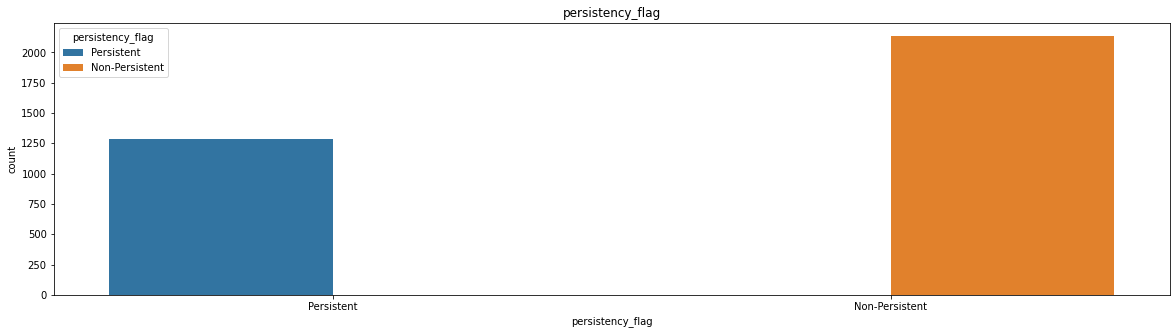

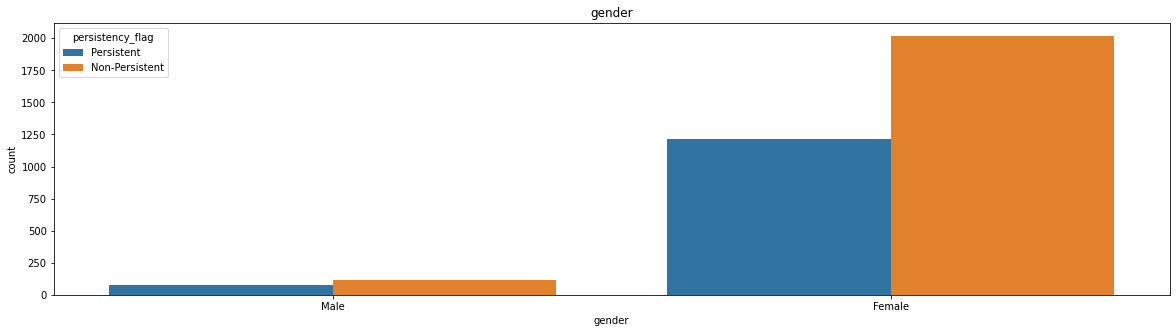

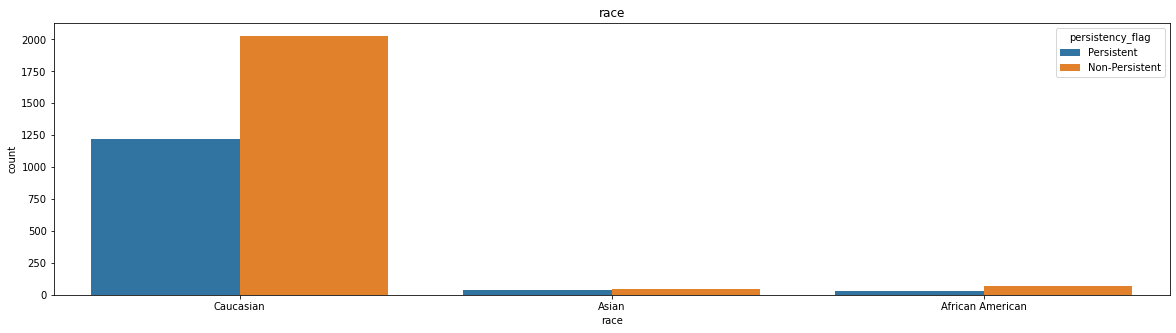

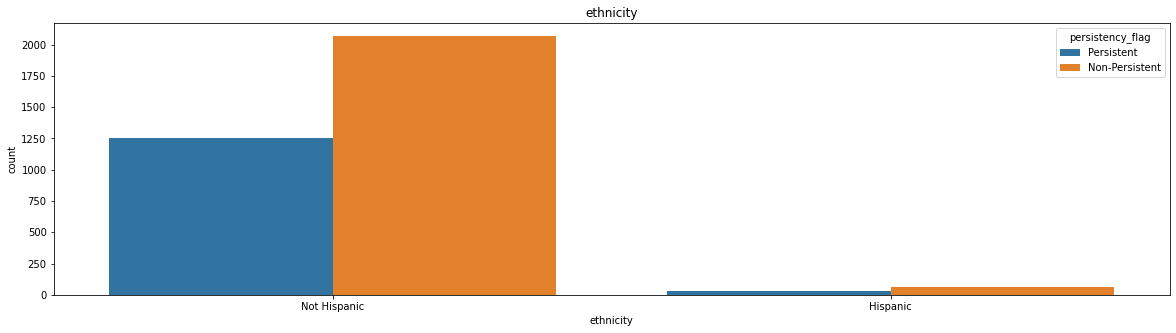

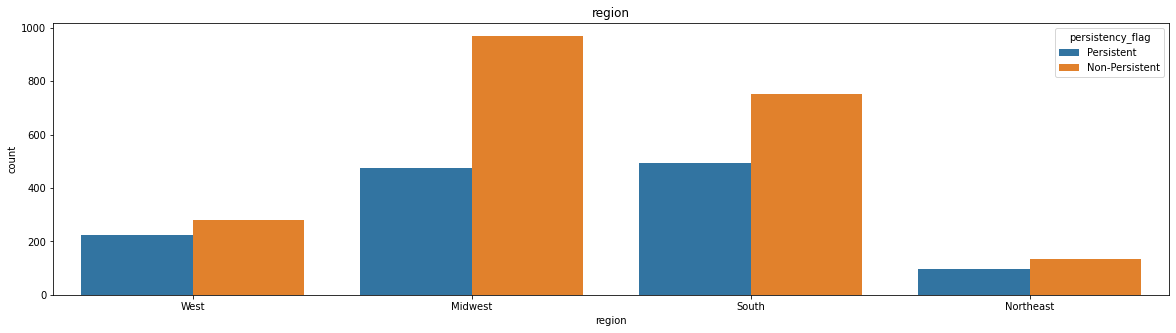

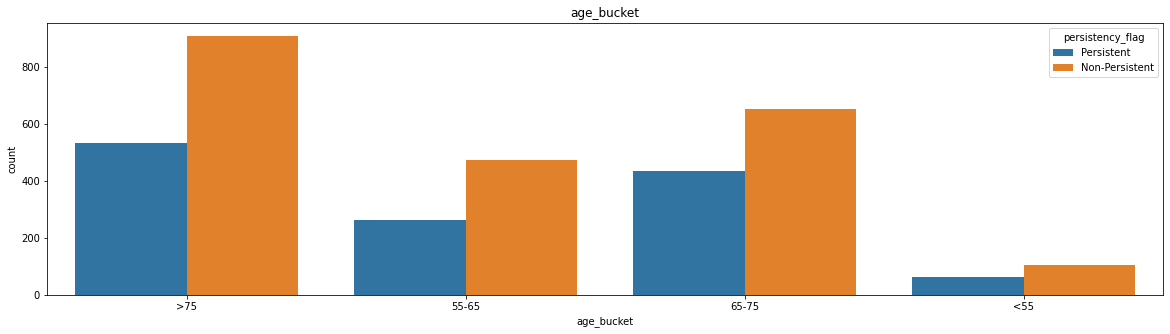

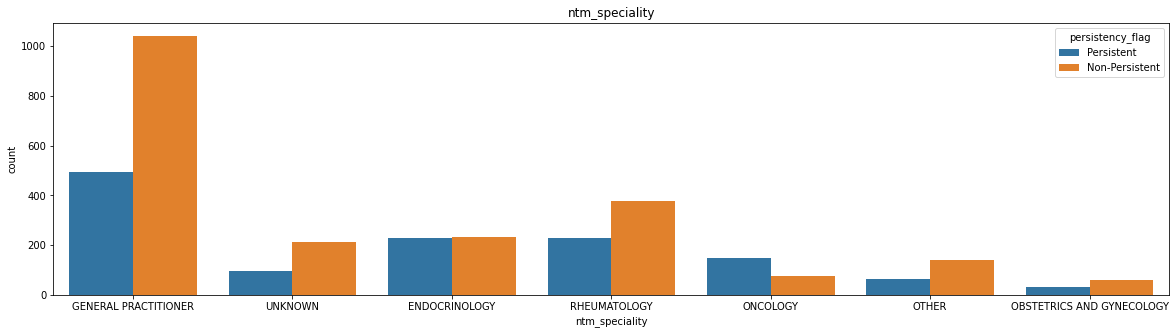

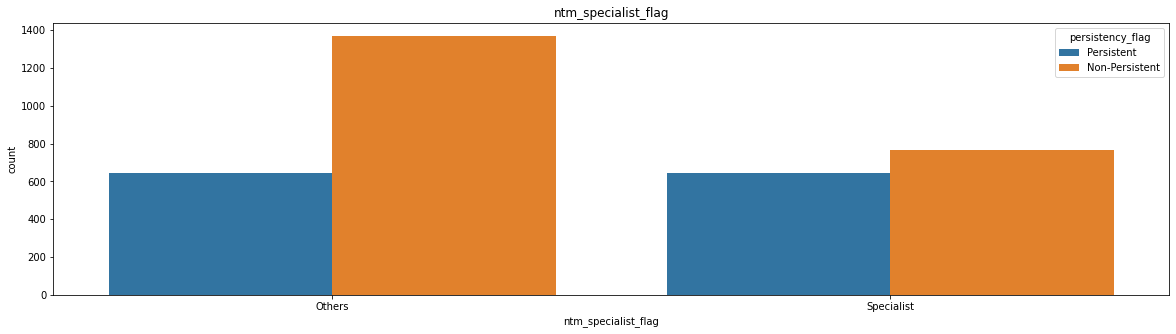

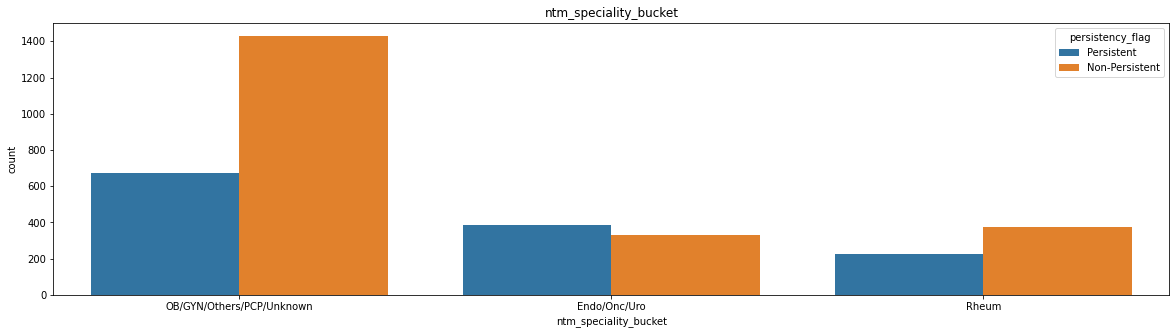

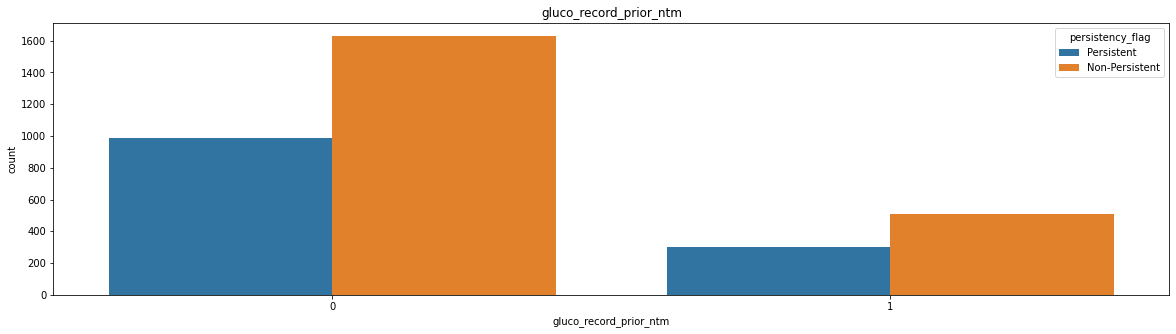

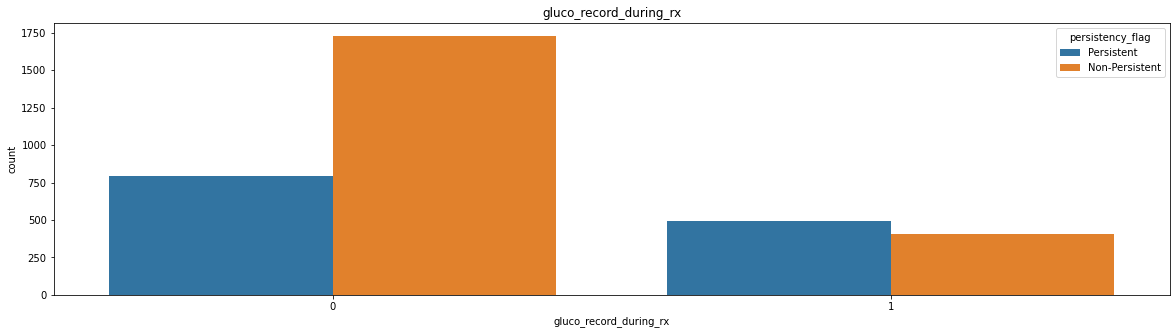

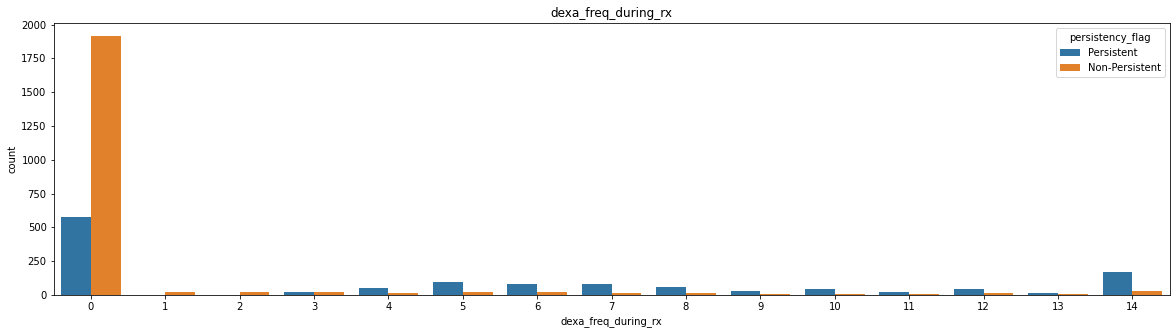

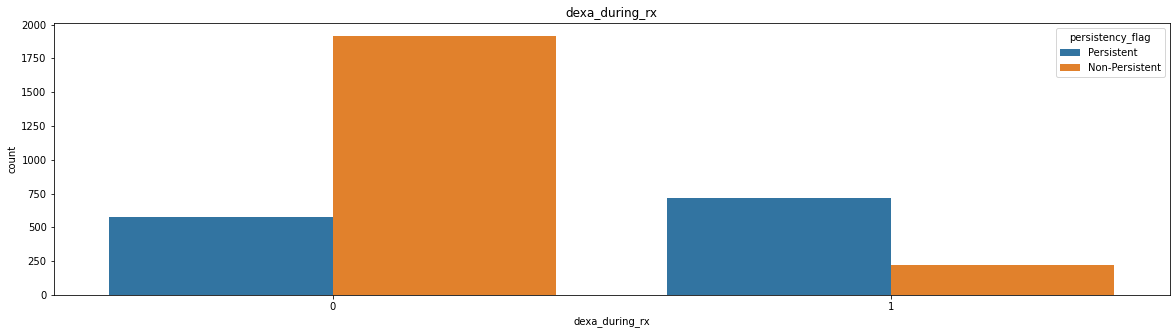

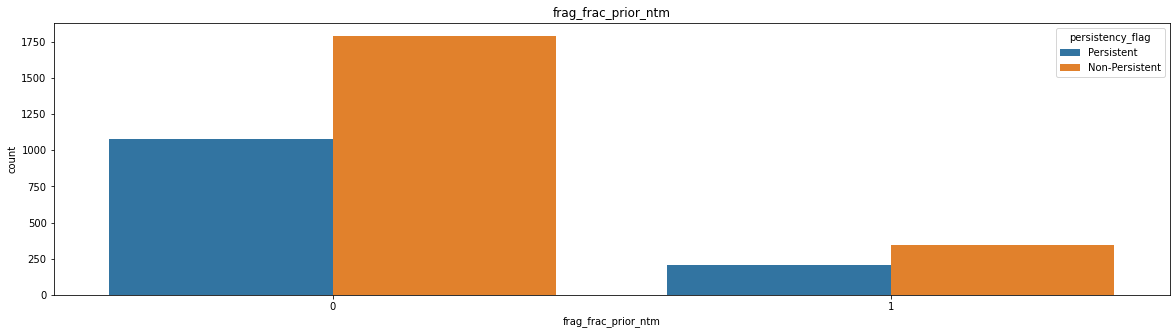

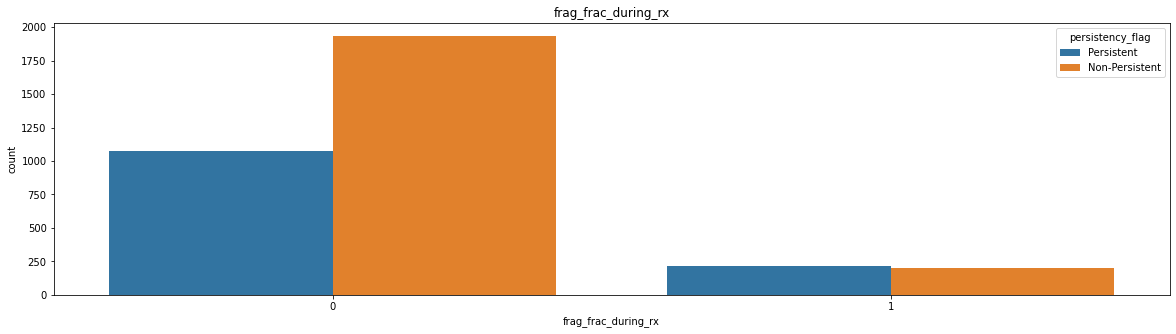

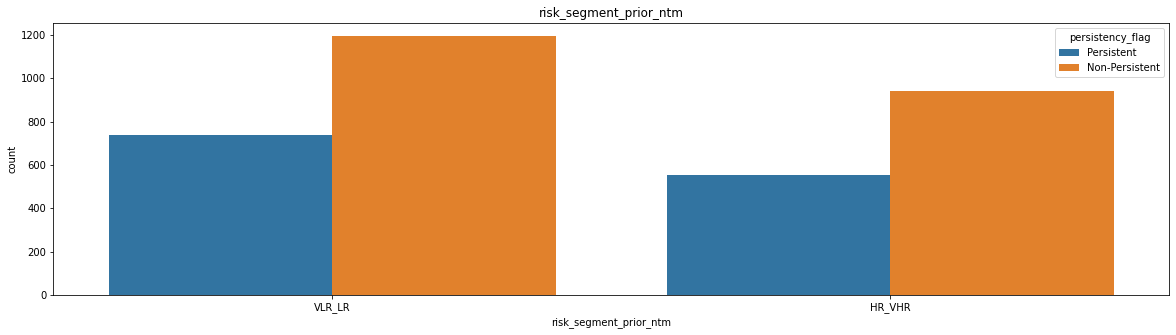

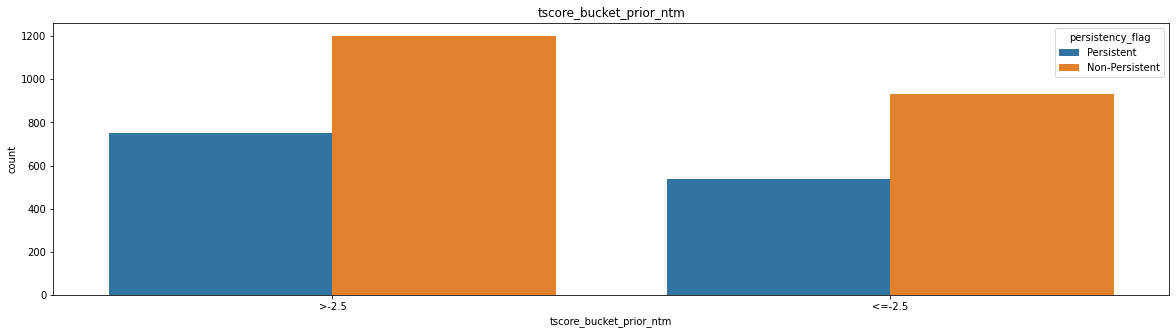

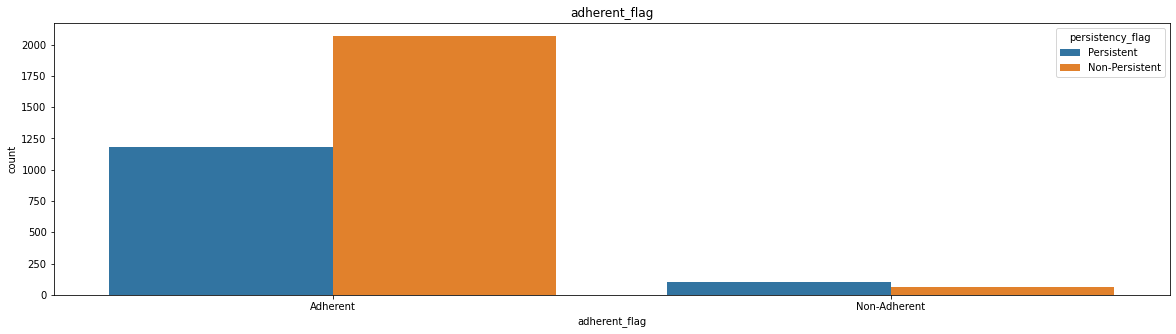

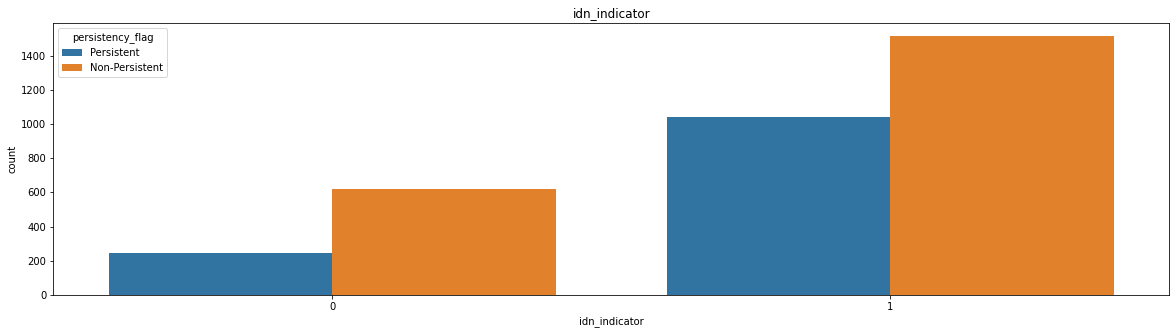

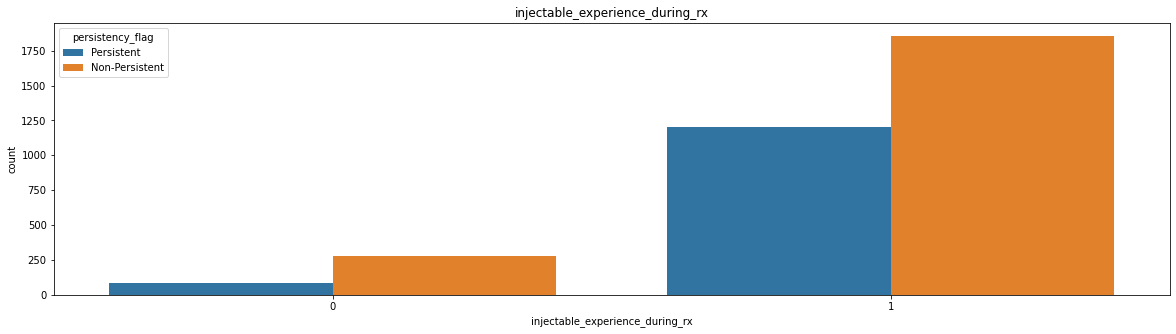

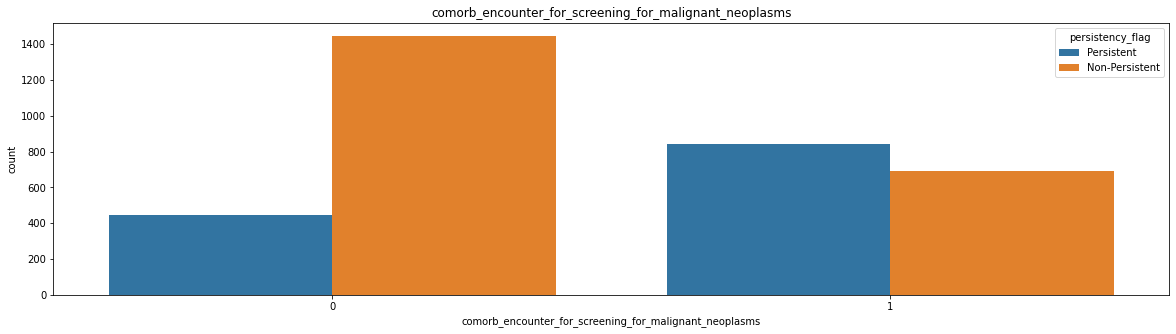

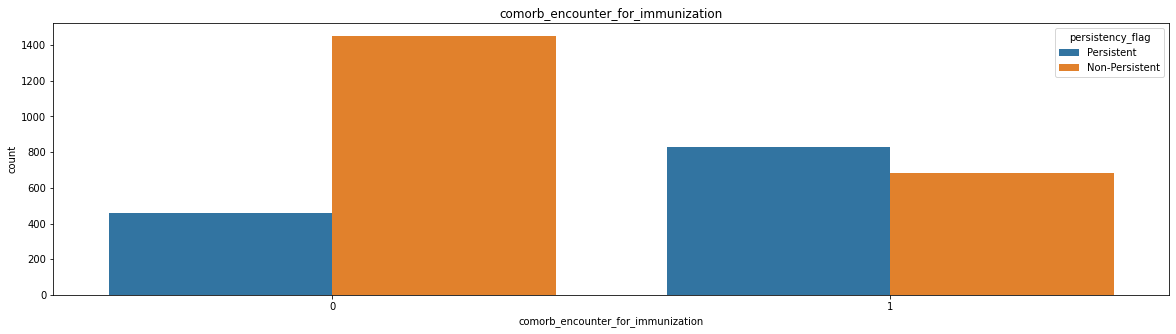

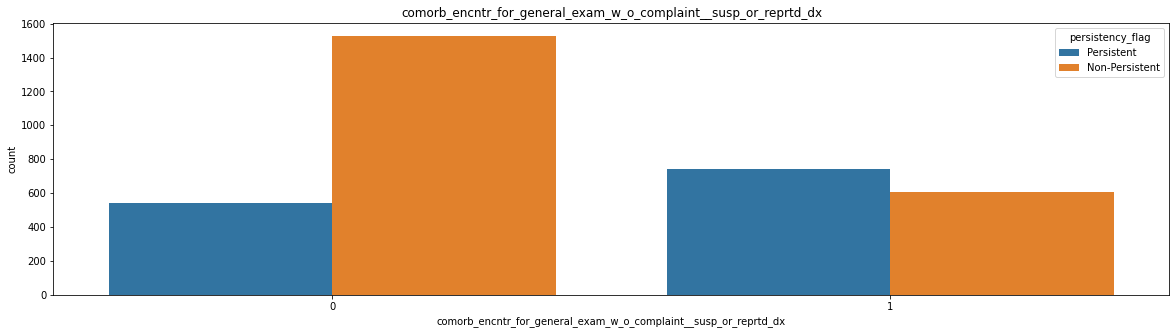

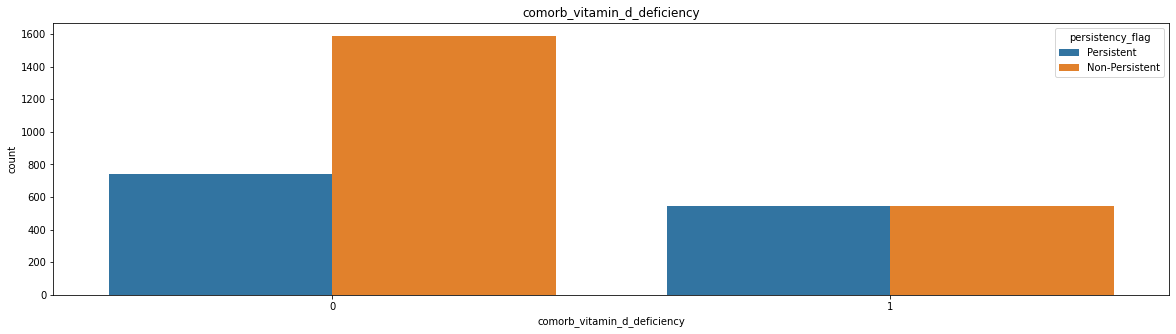

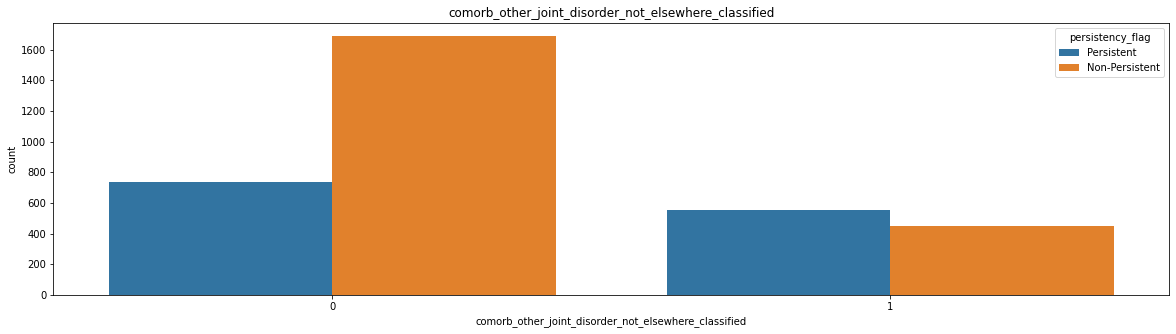

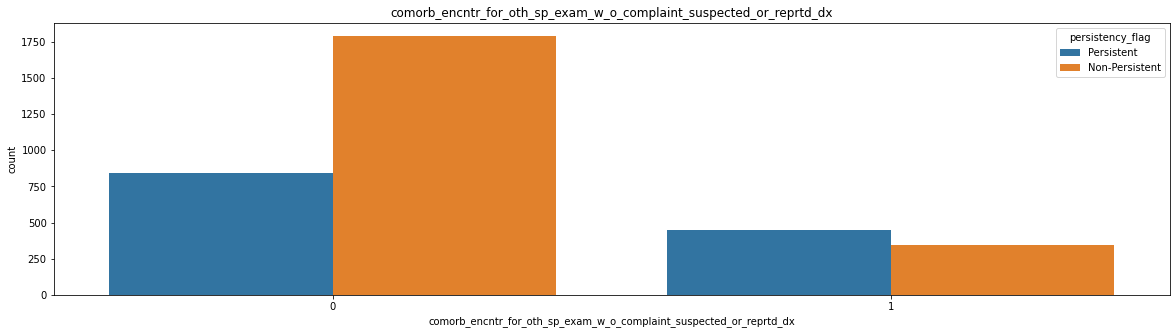

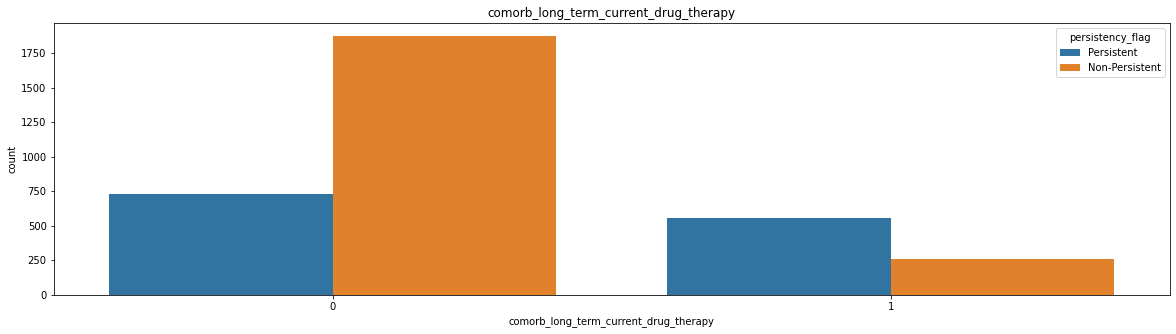

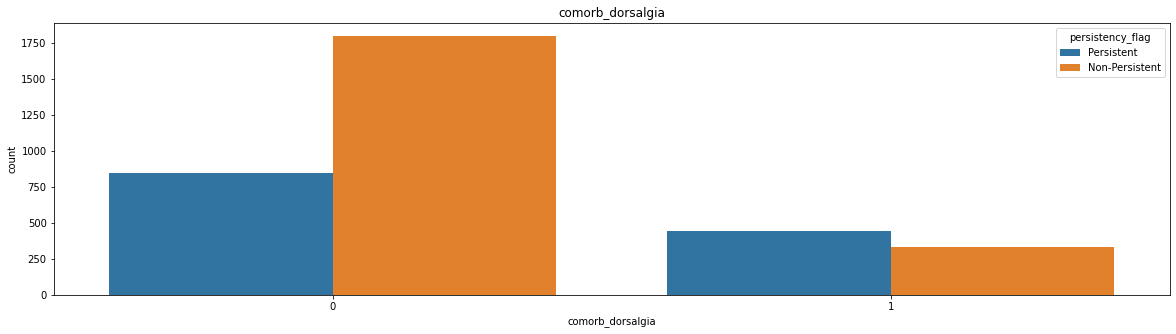

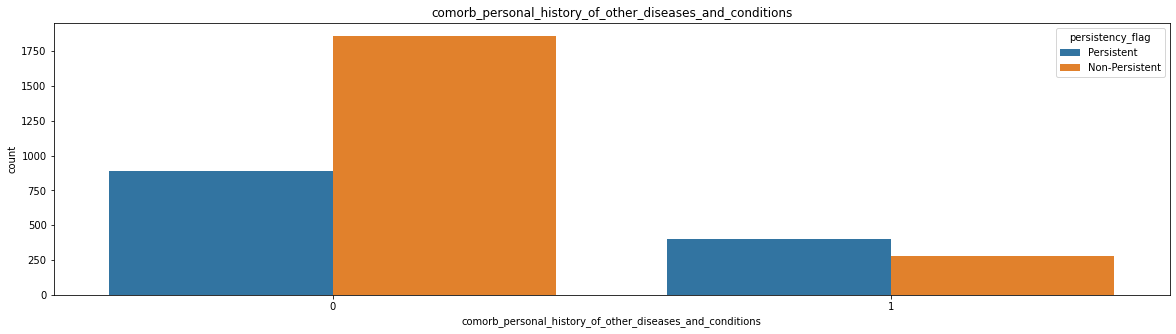

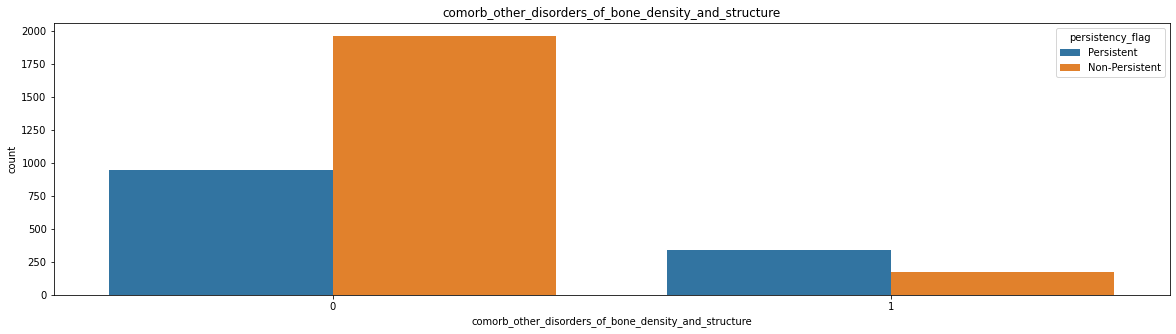

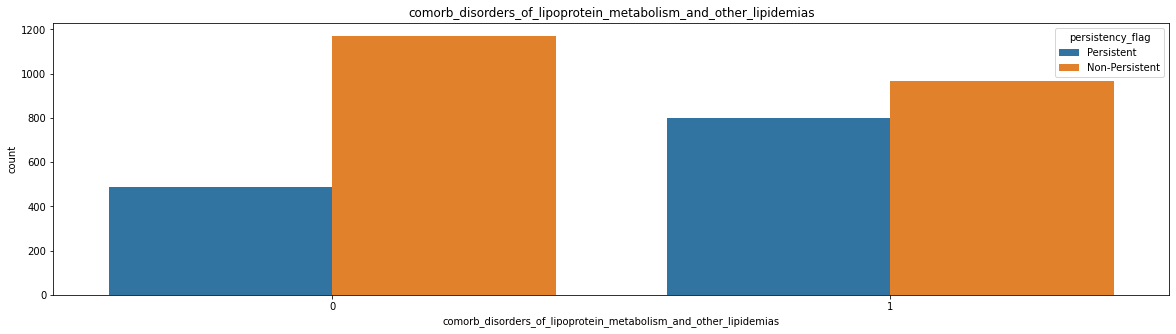

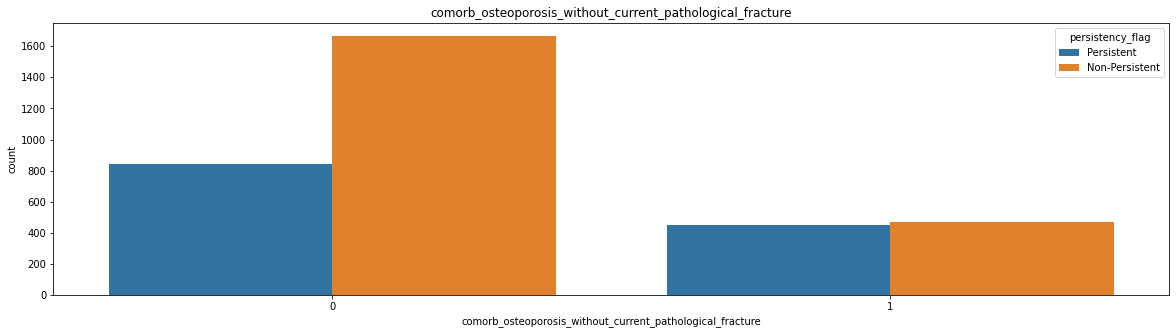

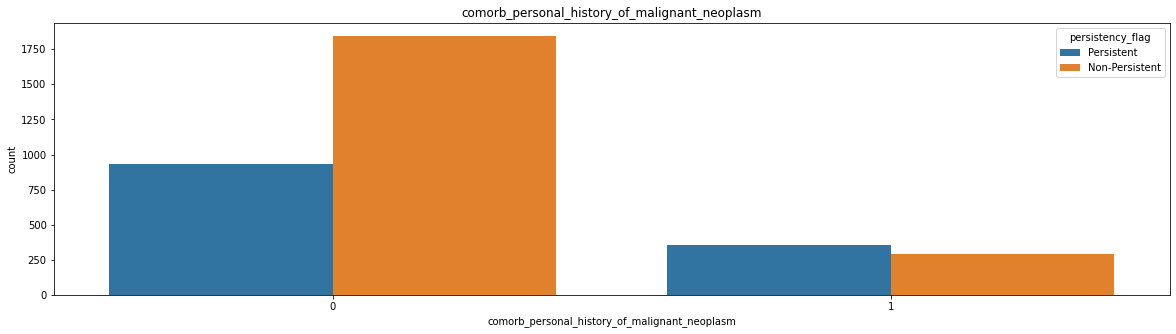

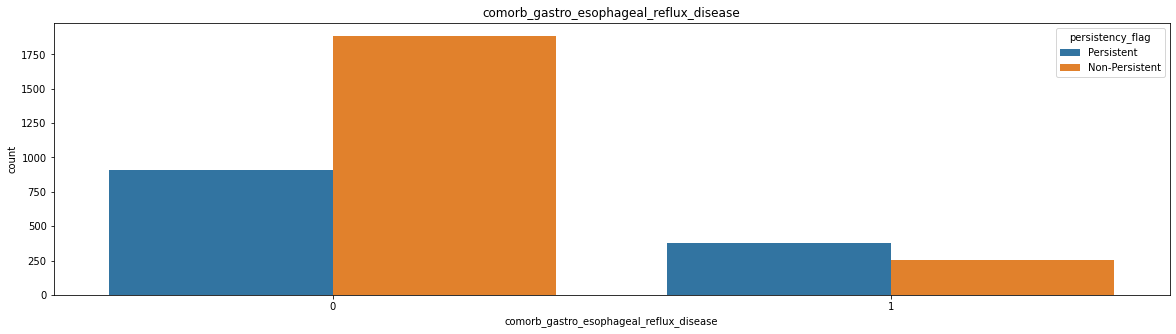

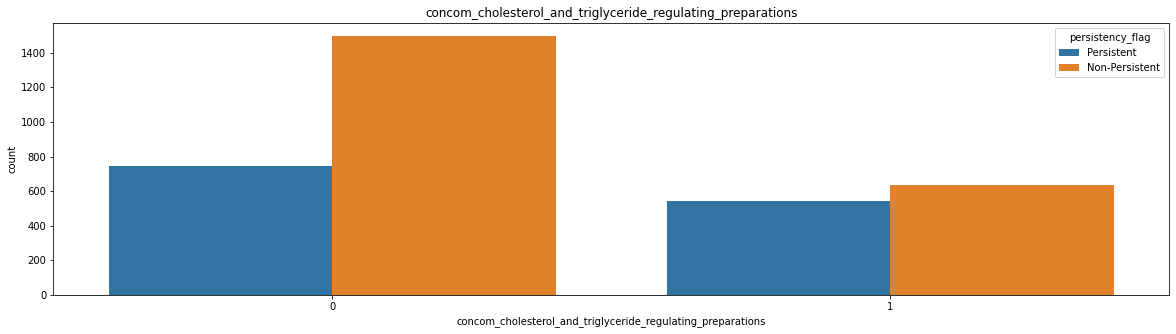

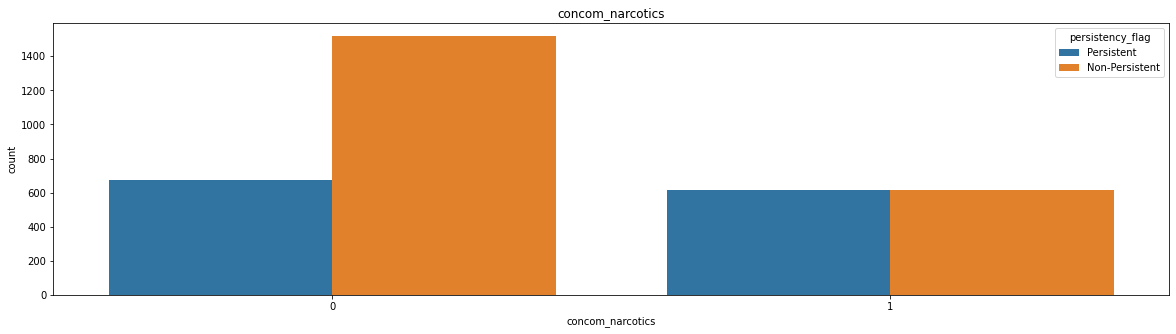

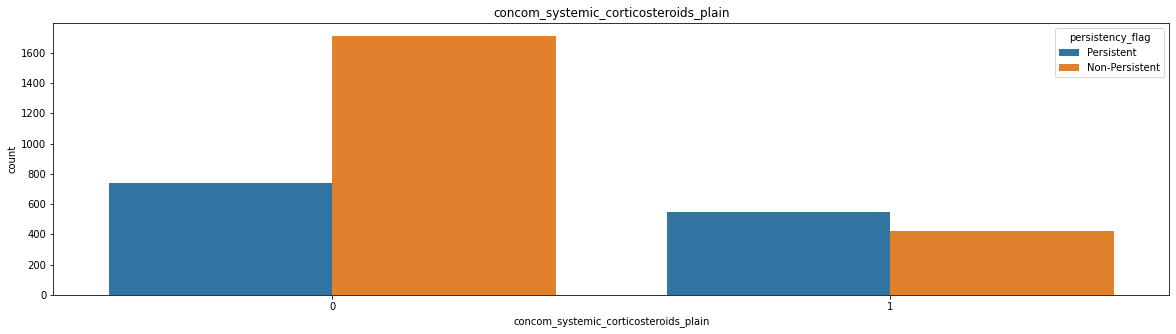

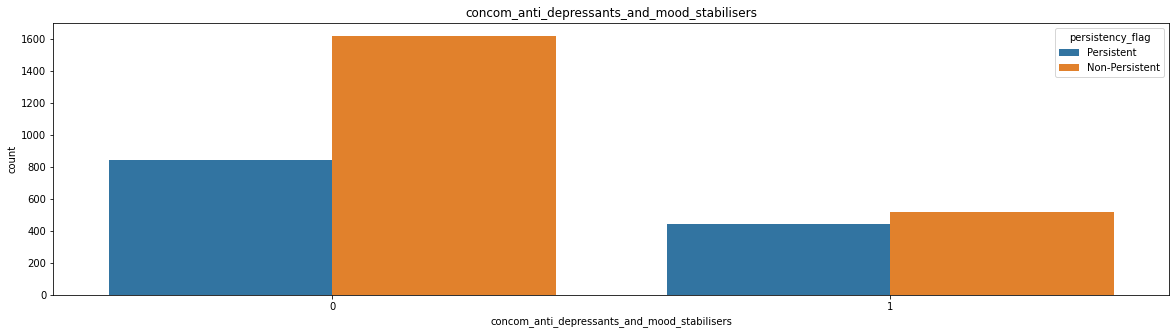

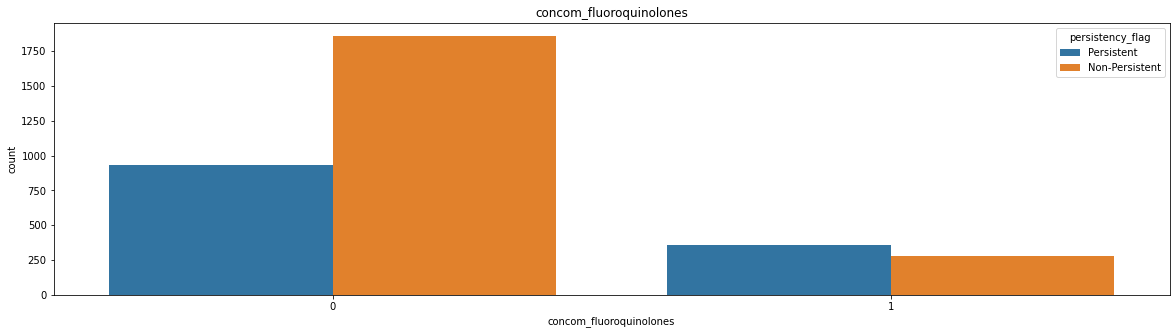

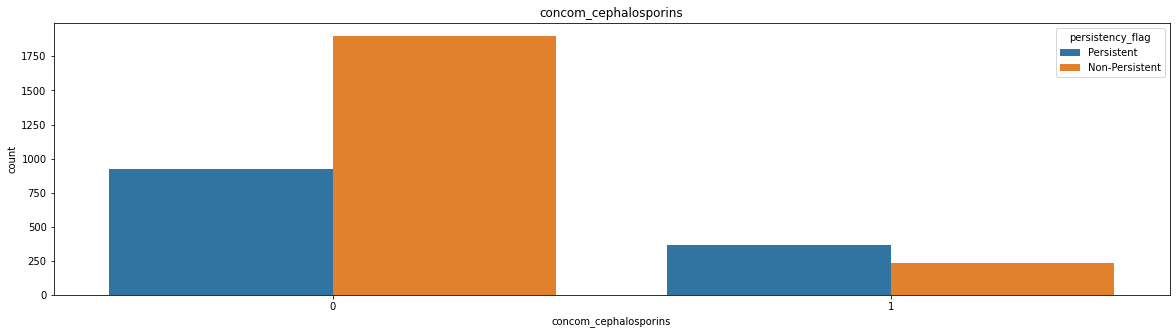

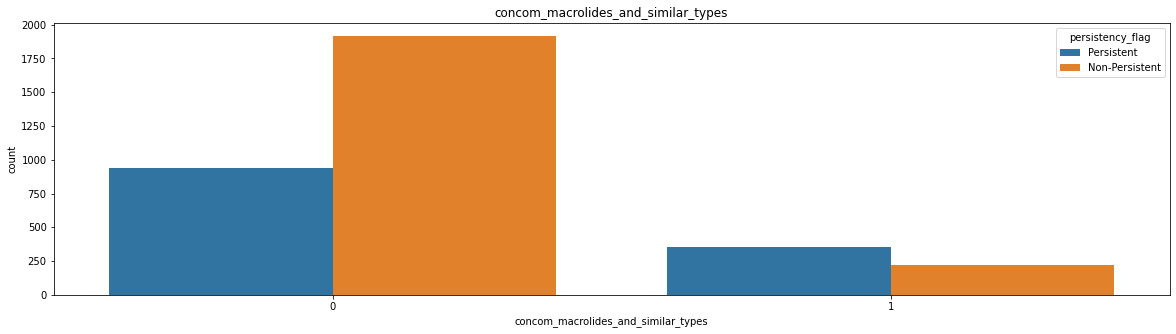

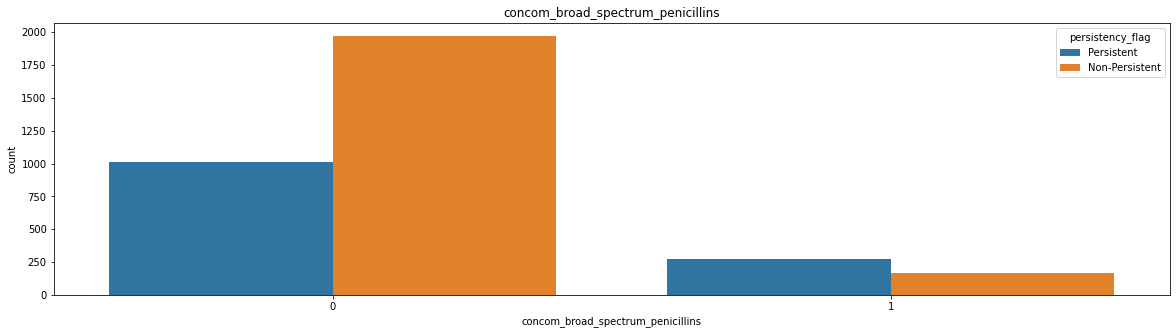

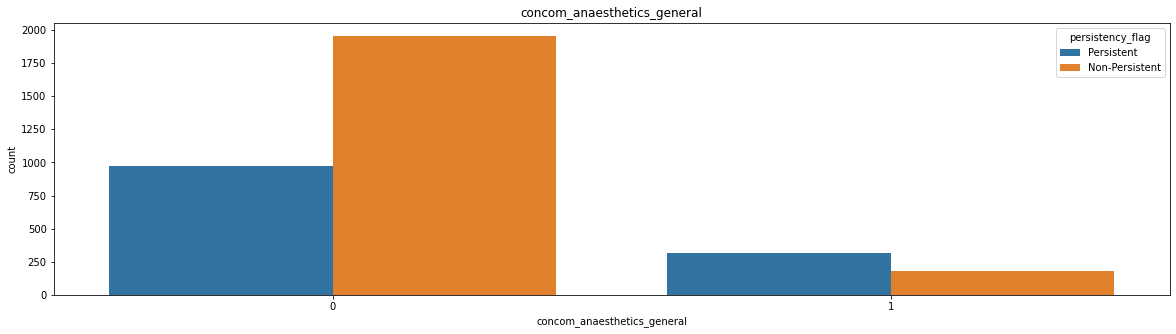

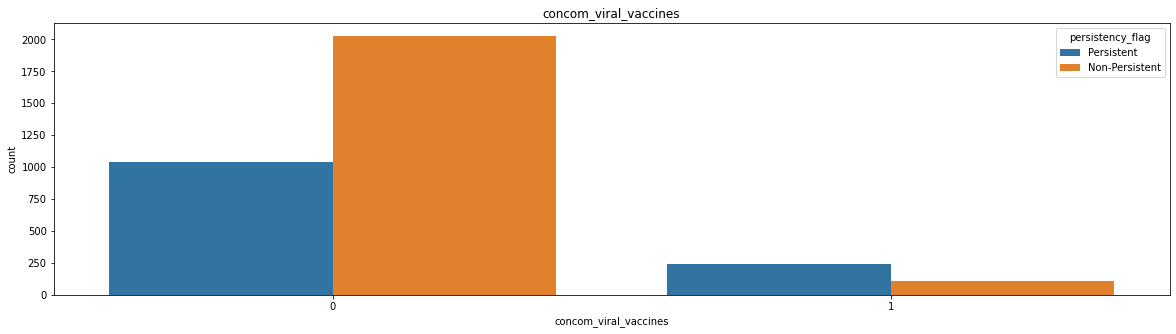

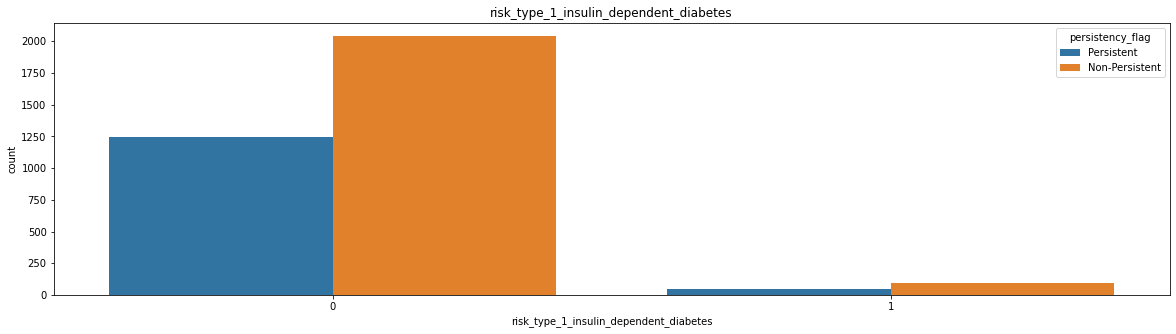

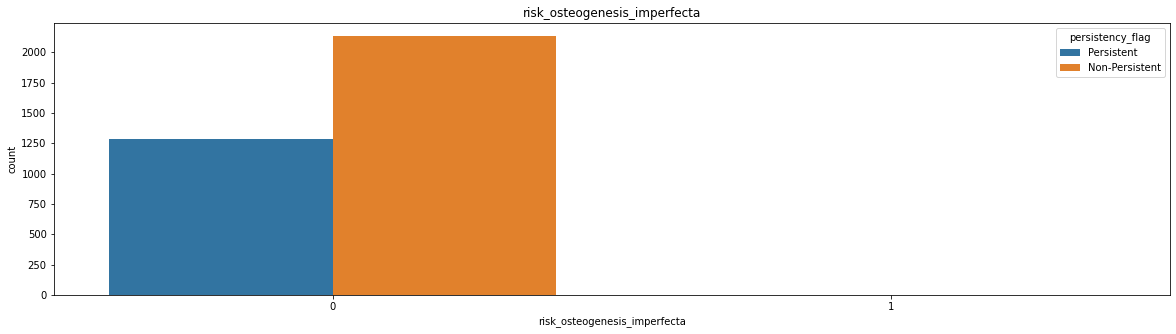

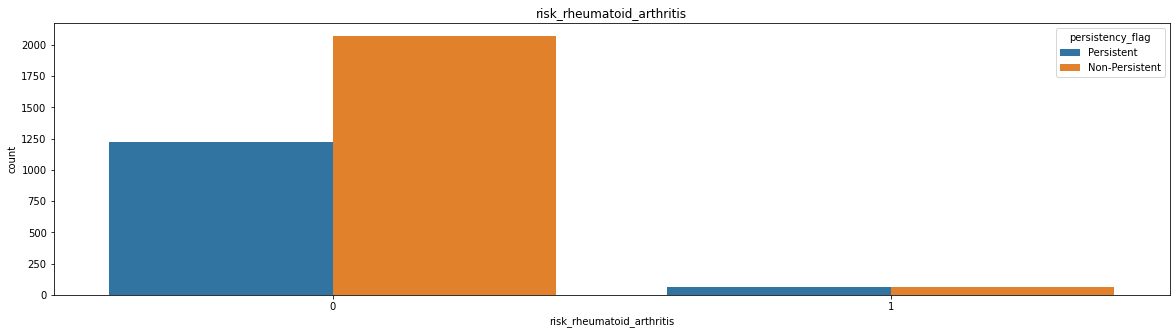

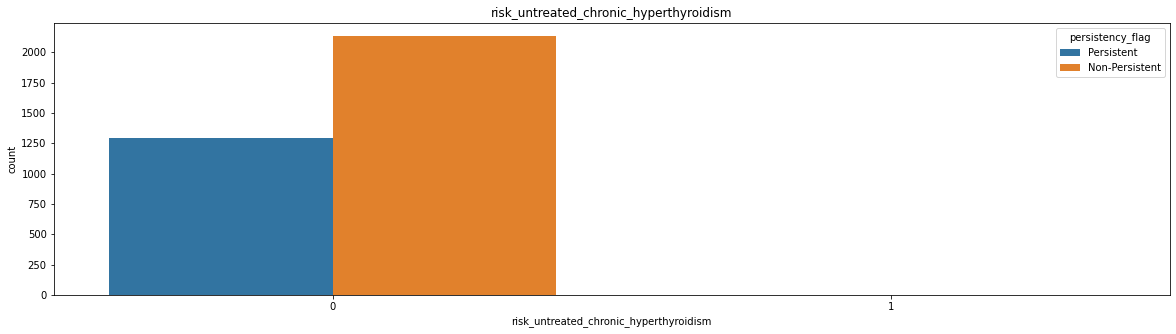

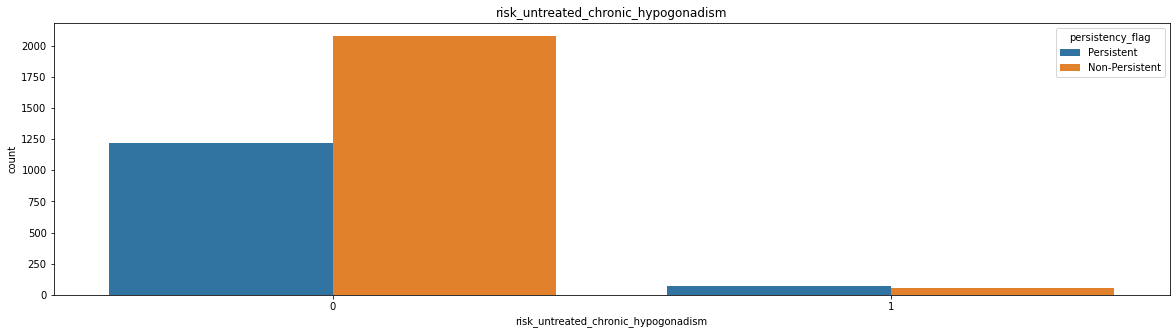

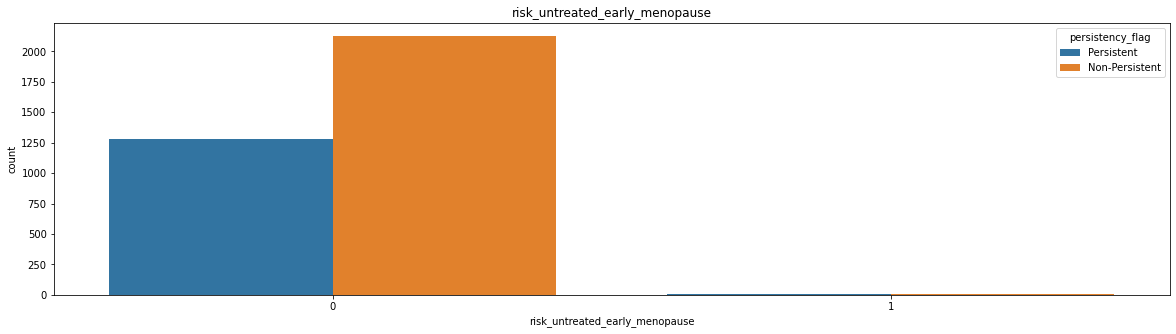

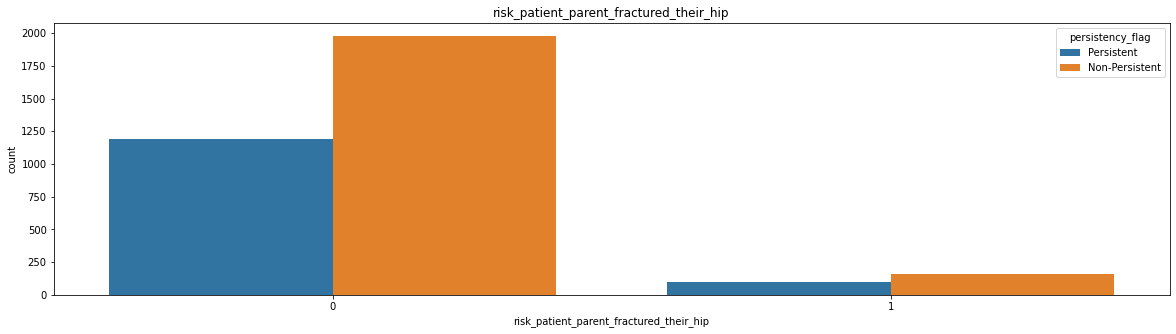

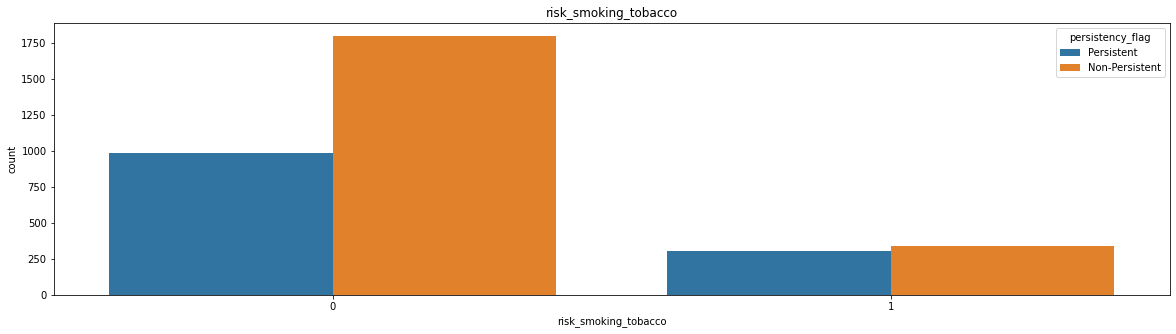

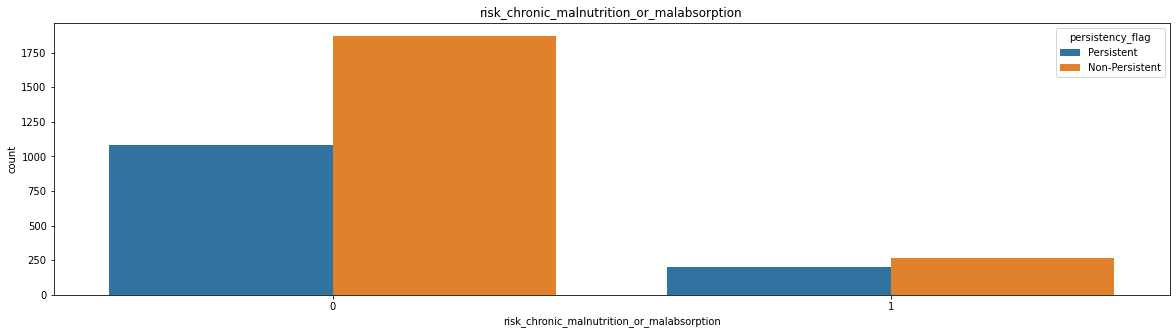

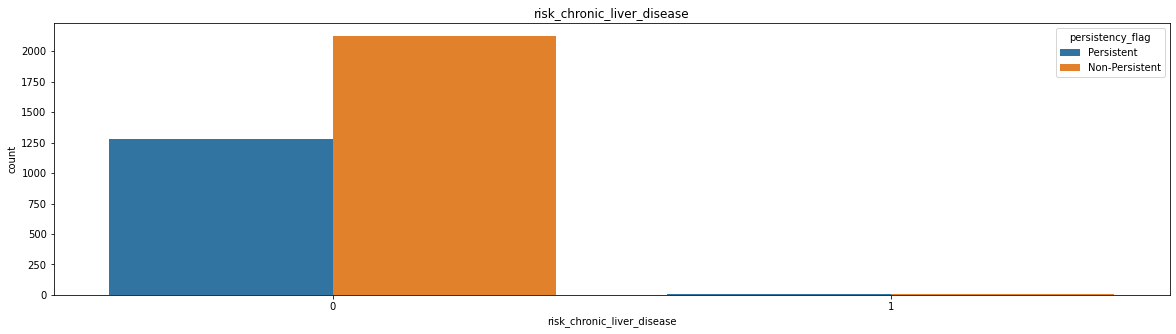

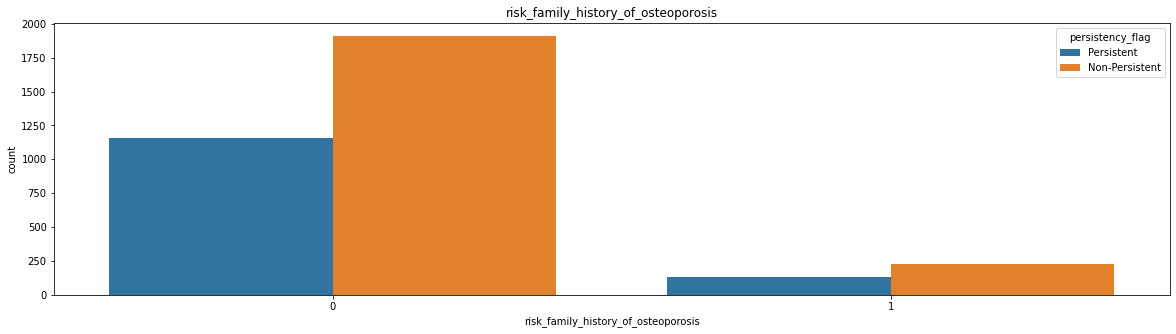

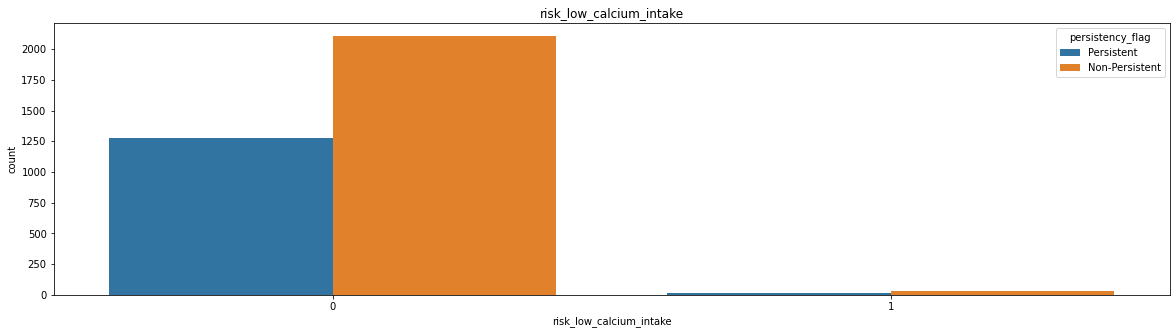

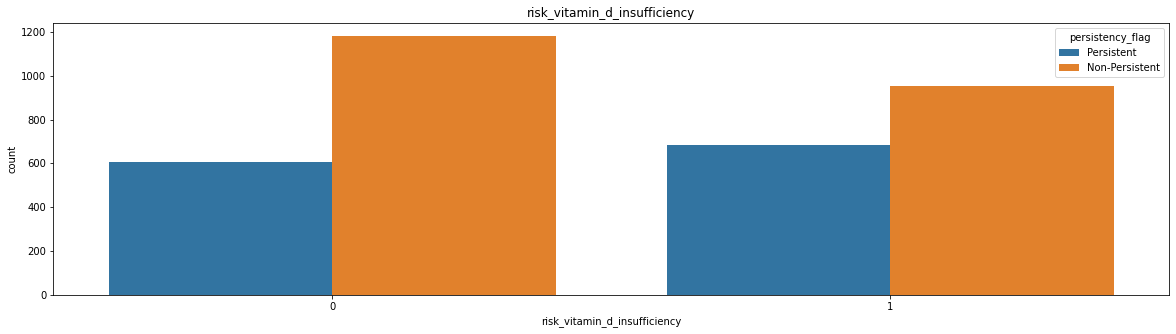

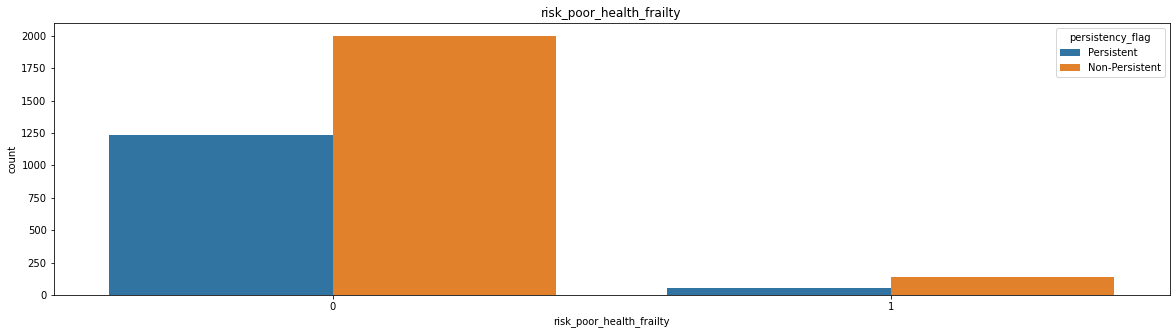

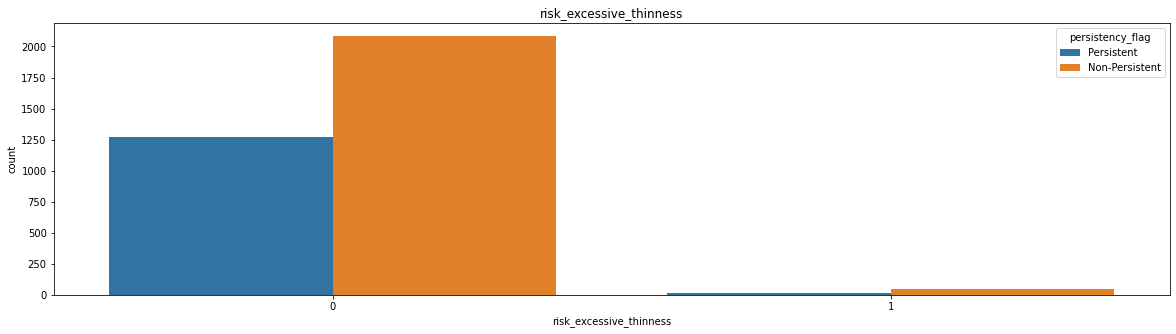

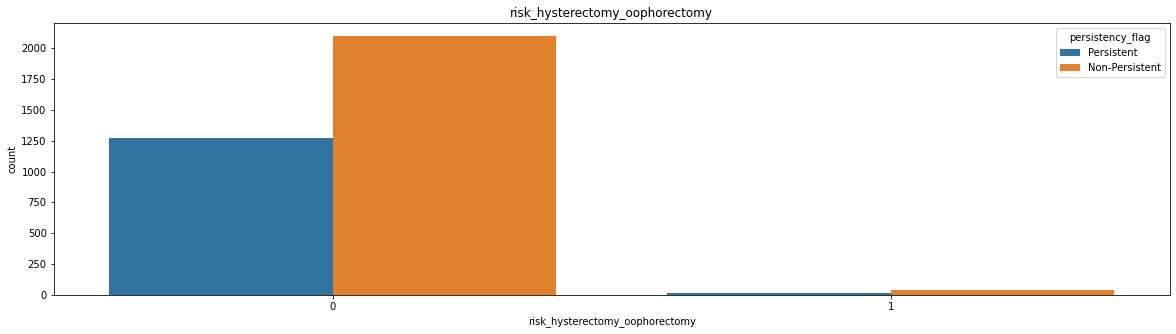

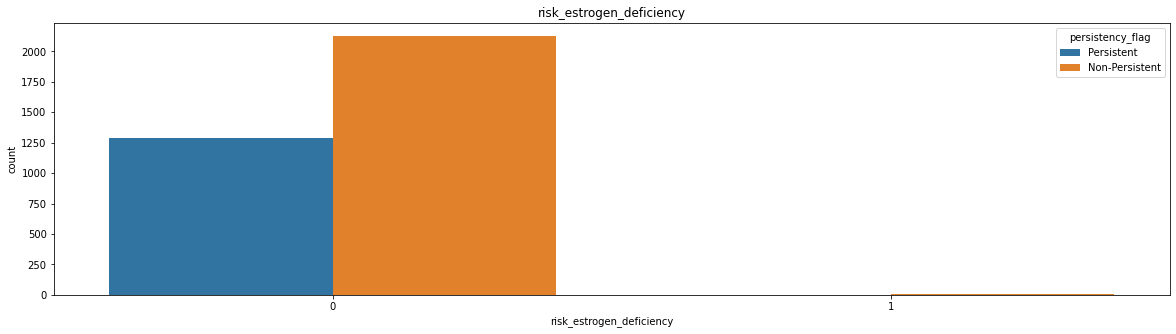

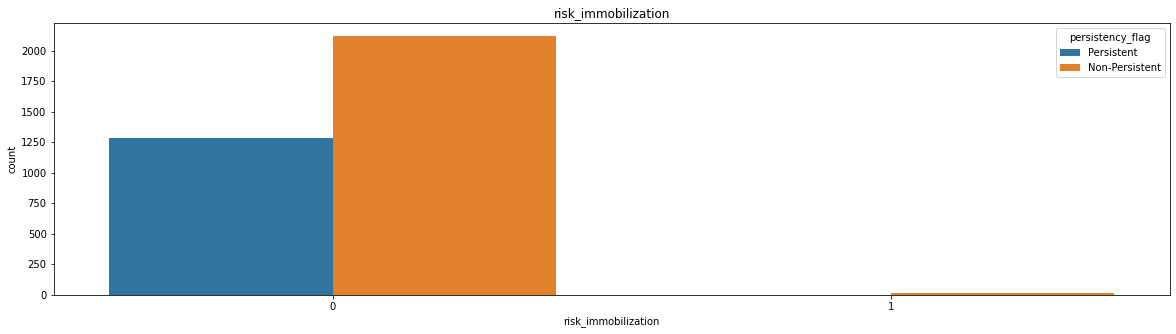

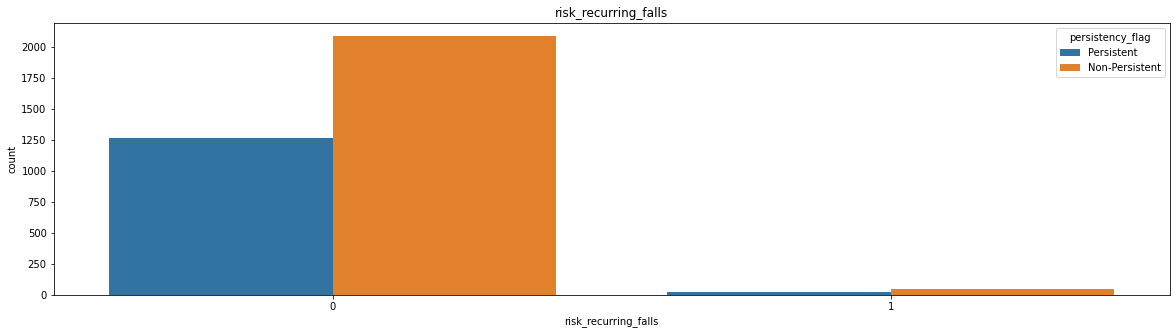

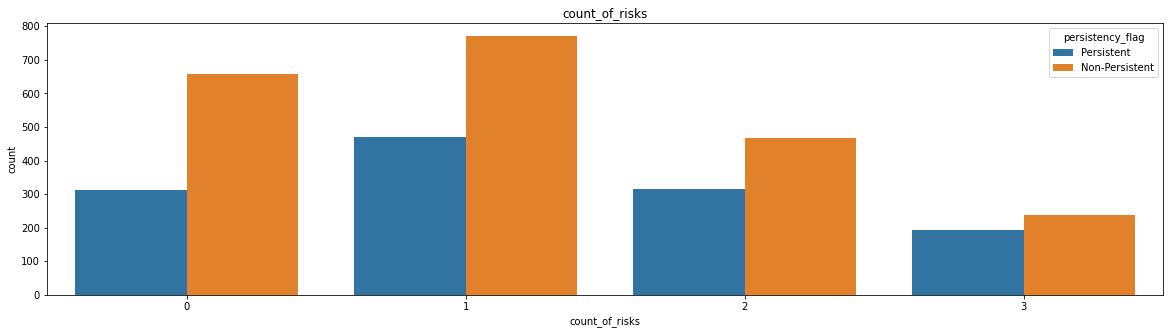

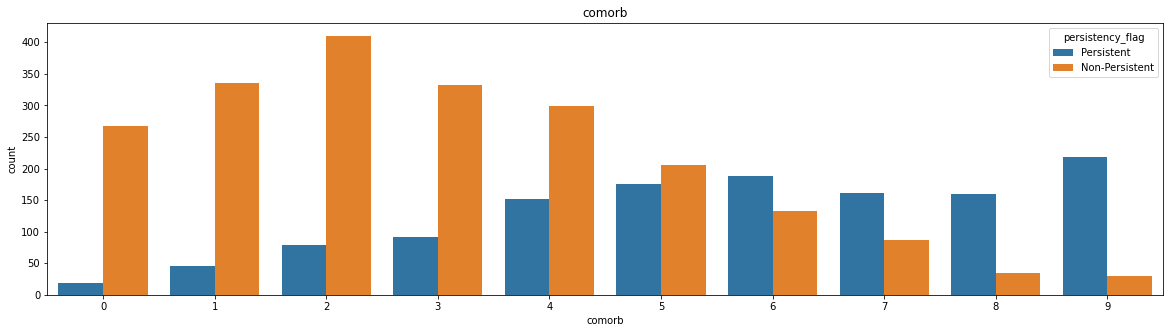

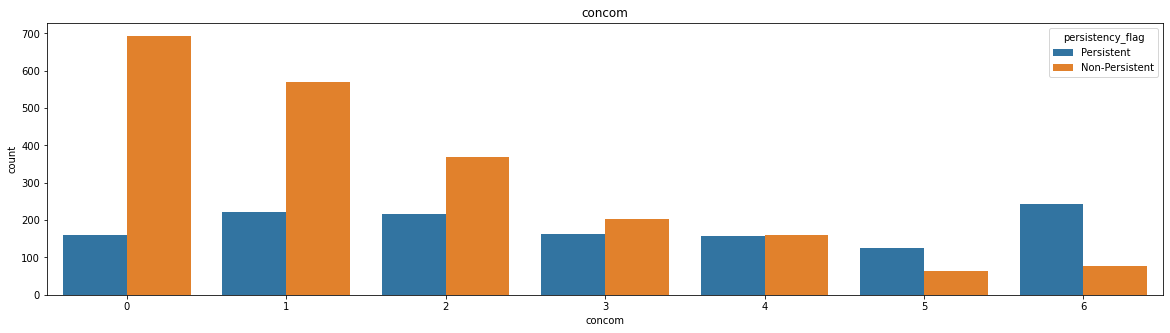

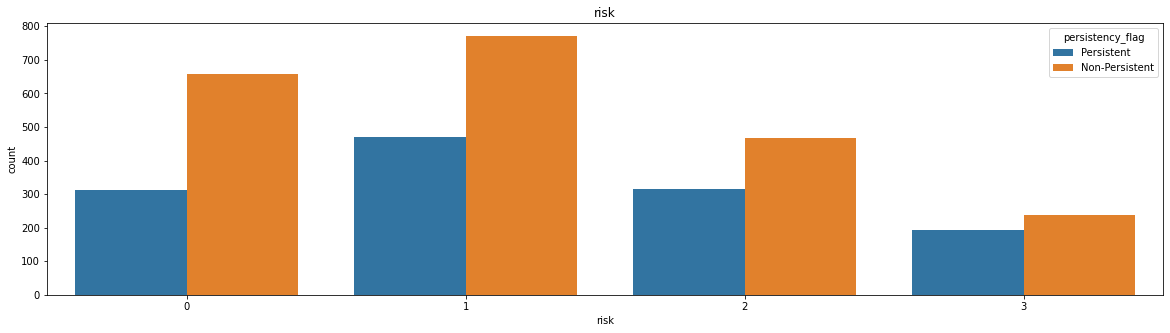

In [279]:
#Countplot for values

for i in df.columns:
    plt.figure(figsize = (20,5))
    plt.title(i)
    sns.countplot(x = i, hue = "persistency_flag", data = df)
    plt.show()

**Findings from Countplots**

1.   Most of the patients are female, non-Hispanic, and Caucasian.
2.   Midwestern area has the highest number of patients but also has the lowest level of persistency.
3. Prescribers with endocrinology or oncology specializations have higher portion of persistent patients.
4. Patients with cancer demonstrate higher persistency level.
5. Patients who have had concomitant general exams without complaint or suspected diagnoses have higher persistency level.
6. Patients who have had concomitant immunizations have higher persistency level.
7. Most of the patients have not taken the DEXA scan. However, patients who have taken the DEXA are more persistent to the therapy.
8. Patient populations with higher number of comorbidities, concomitant therapies, or risks have higher persistency levels as well.

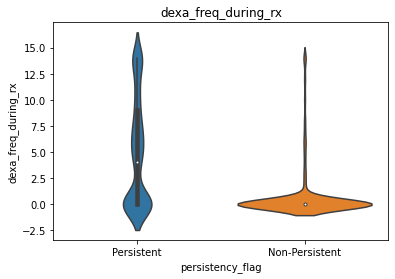

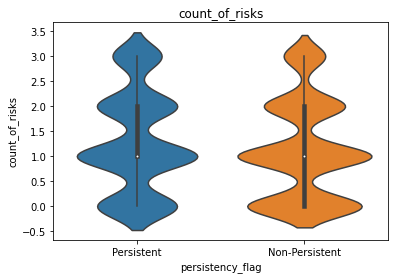

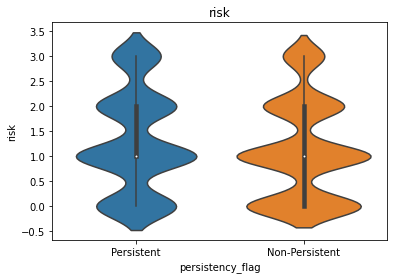

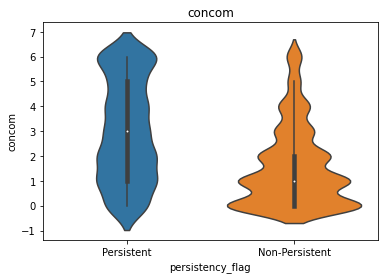

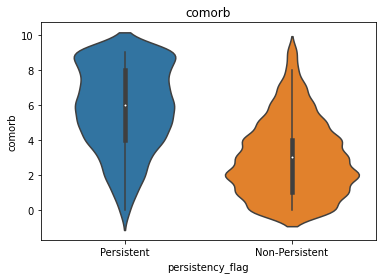

In [280]:
#Violin plot for quants

nums=['dexa_freq_during_rx','count_of_risks','risk','concom','comorb']

for i in nums:
    plt.figure()
    plt.title(i)
    sns.violinplot(x = "persistency_flag", y=i, data = df)
    plt.show()

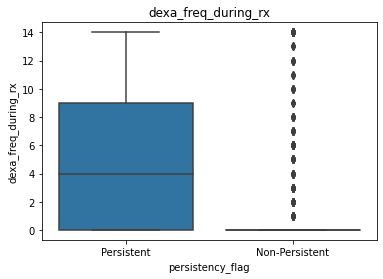

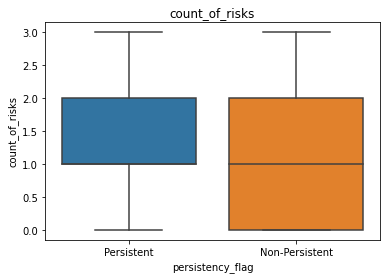

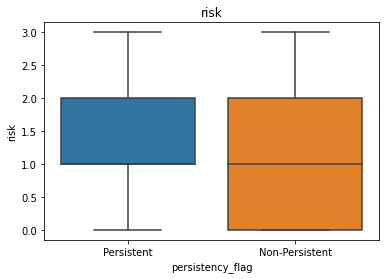

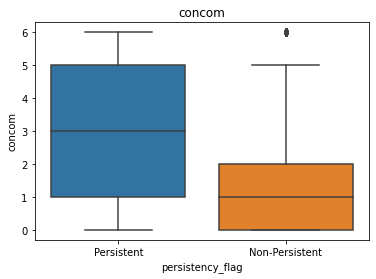

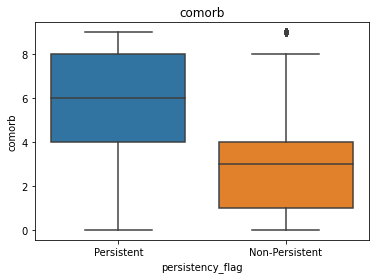

In [281]:
#Box plots for quants

nums=['dexa_freq_during_rx','count_of_risks','risk','concom','comorb']

for i in nums:
    plt.figure()
    plt.title(i)
    sns.boxplot(x = "persistency_flag", y=i, data = df)
    plt.show()

**Findings from Violin & Box Plots**



1.   In both persistent and non-persistent groups, most of the patients have not taken the DEXA scan. However, persistent group have higher portion of patients who have taken the scan, contributing to the higher mean. The number of scans taken varies significantly among the persistent patients.
2.   Persistent and non-persistent patients do not show significant difference in number of risks ('risk', 'count_of_risks') distribution.
3. Regarding number of concomitant therapies and comorbities, persistent groups have higher means and modes.


# **Conclusion**


*   Persistent group has higher mean number of comorbidities and concomitances compared to the non-persistent counterpart.
*   Persistent group has higher mean number of DEXA scans compared to the non-persistent group.
*   Prescribers with certain specializations (e.g. Oncology and Endocrinology) have higher proportion of persistent patients compared to the others. 




# **Model Recommendations**


*   This is a classification project, so using classifiers such as Linear Regression Classifier, Naive Bayes, K-Neighbors, Random Forest Classifier, Support Vector Machines, or XGBoost is recommended.
*   To save computational efforts, starting from simple Linear Regression then trying kernel or ensemble models is recommended.
*   The dataset has a substantial number of features, so using PCA or RFE to choose most important features is recommended.

